# A Quick Exploration of the Best classes

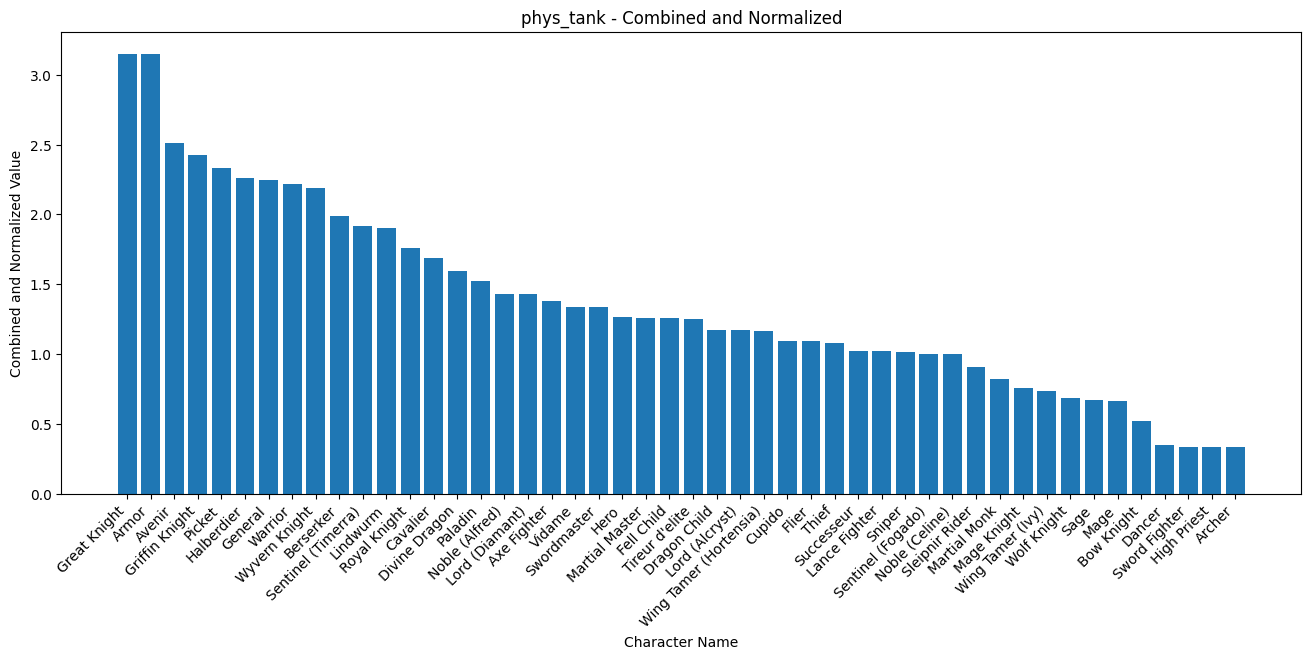

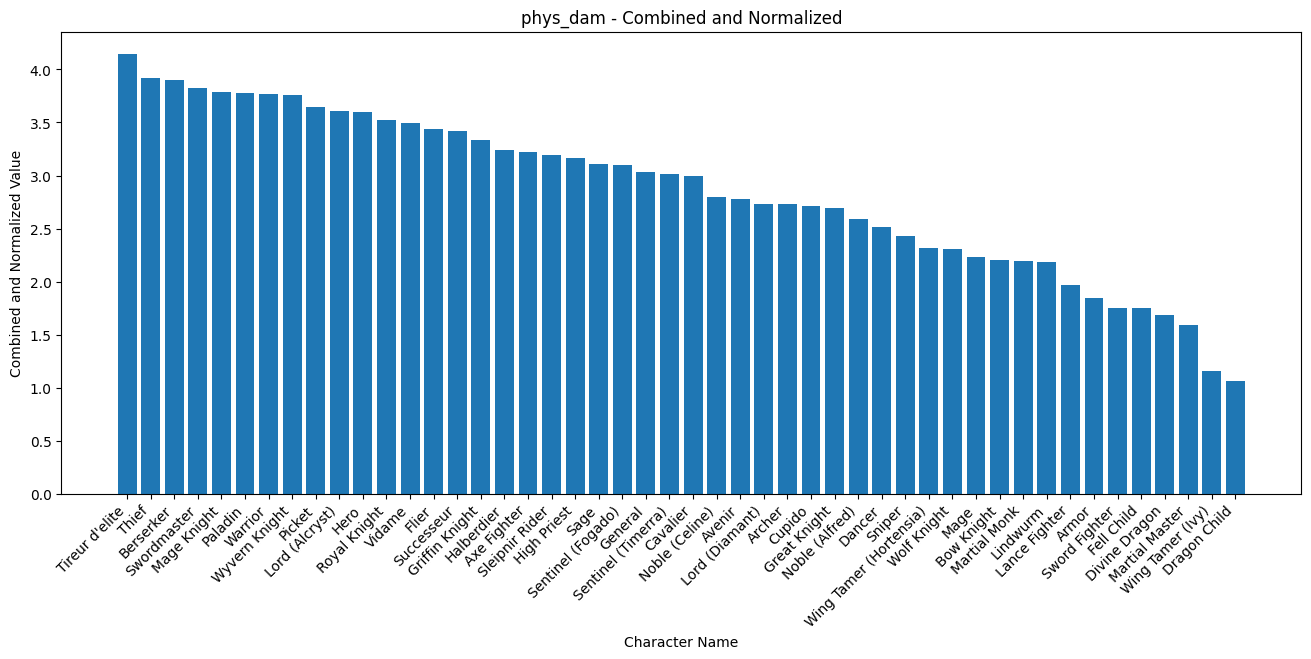

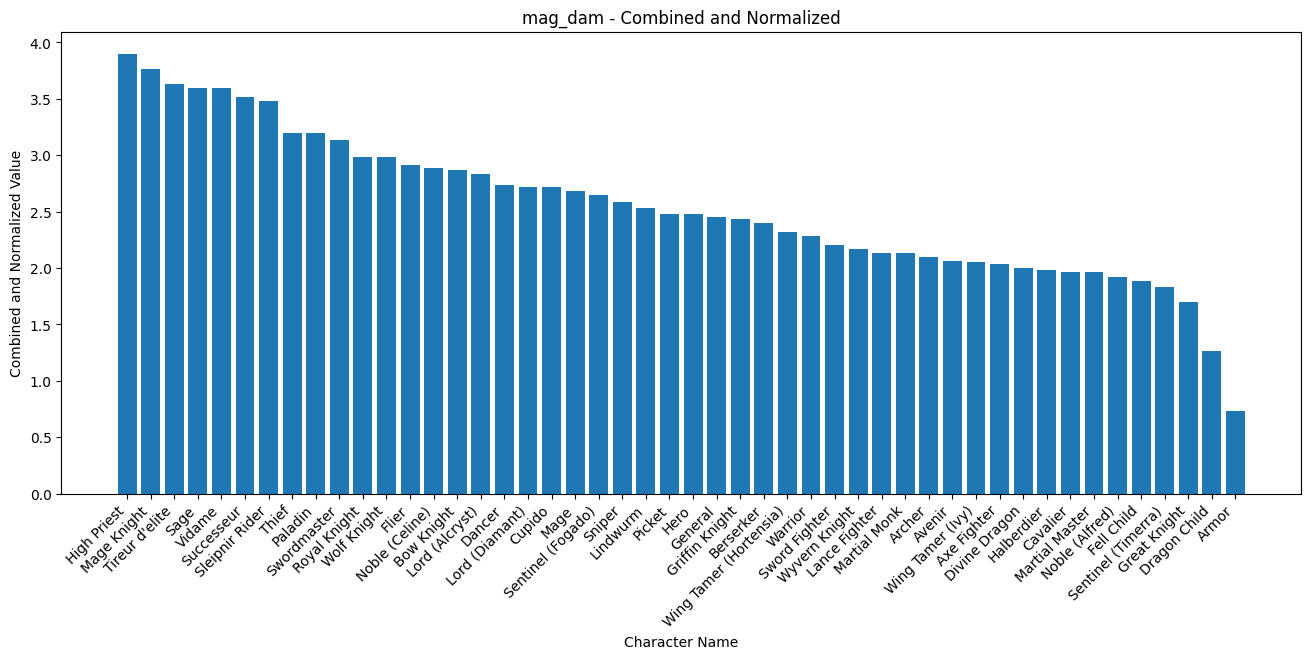

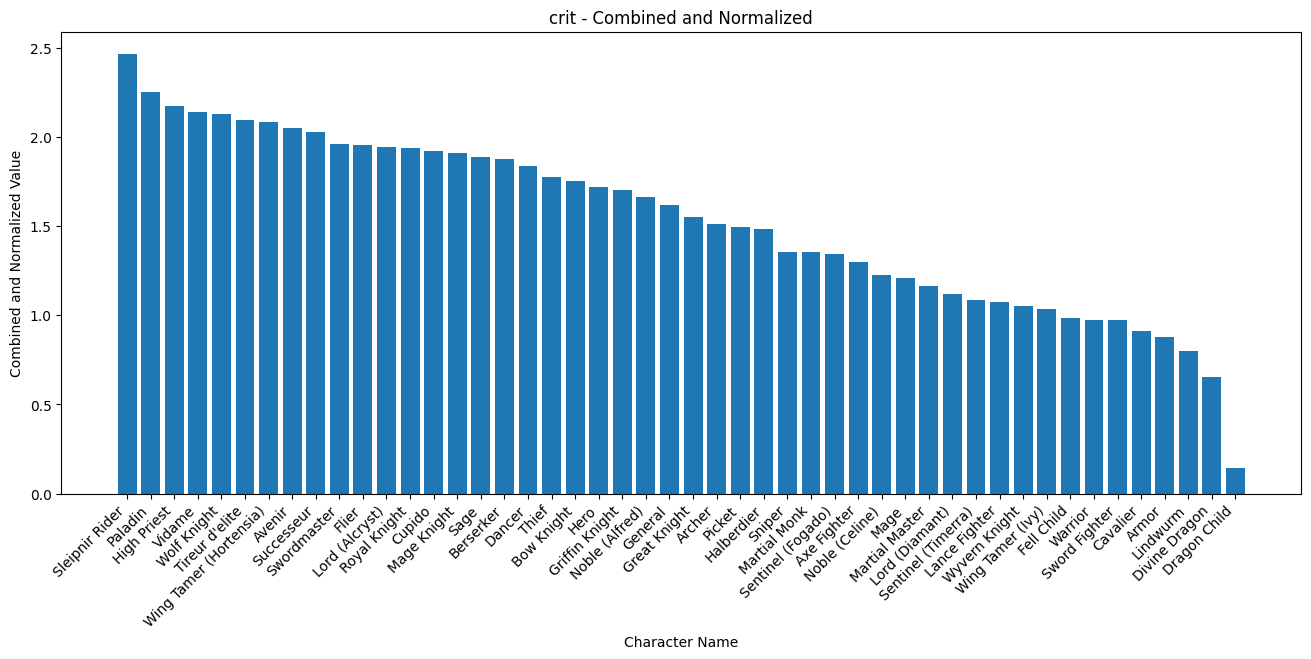

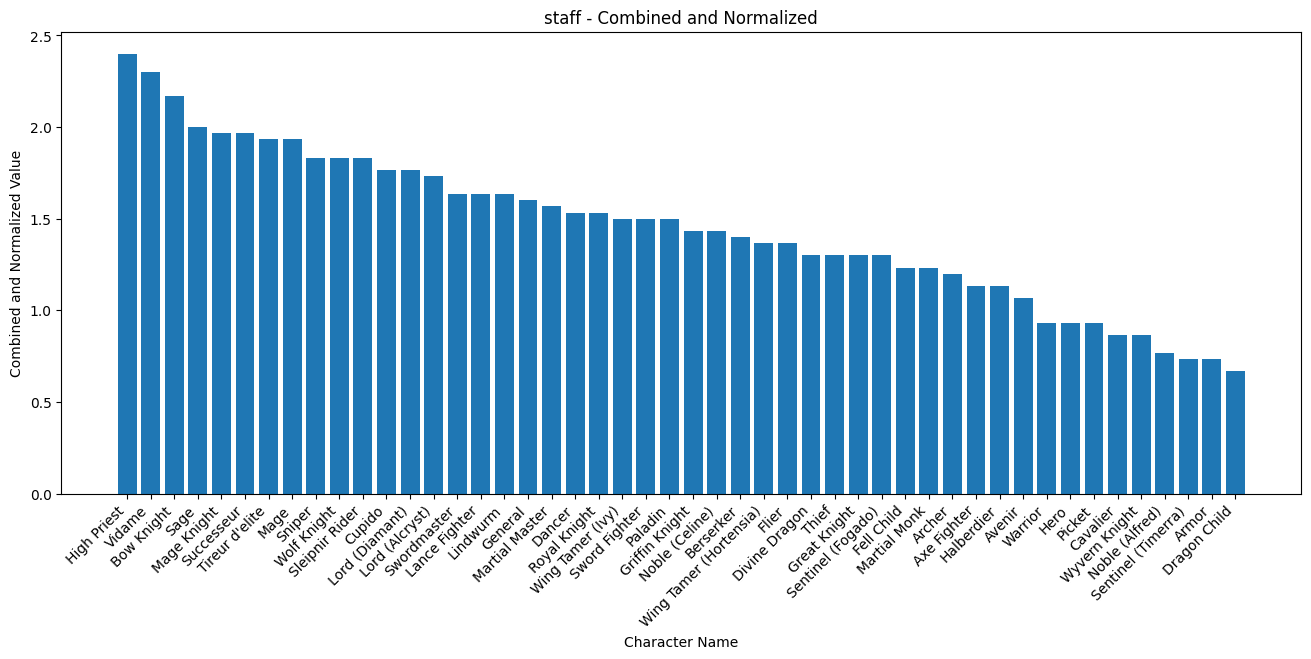

In [16]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def normalize_and_combine(features, f_name, df_char_bases, df_char_growths, combined_df):
    # Initialize MinMaxScalers
    scalers = {feature: MinMaxScaler() for feature in features}

    # Create copies of DataFrames
    bases_norm = df_char_bases.copy()
    growths_norm = df_char_growths.copy()

    # Normalize features
    for feature in features:
        bases_norm[feature] = scalers[feature].fit_transform(bases_norm[[feature]])
        growths_norm[feature] = scalers[feature].fit_transform(growths_norm[[feature]])

    # Create 'phys_tank' columns
    bases_norm[f_name] = bases_norm[features].sum(axis=1)
    growths_norm[f_name] = growths_norm[features].sum(axis=1)

    # Combine 'Name' and 'phys_tank' columns
    combined_df['Name'] = bases_norm['Name']
    combined_df[f_name] = bases_norm[f_name].values + growths_norm[f_name].values

    return combined_df

# load data
df_class_bases = pd.read_csv('fe_17_data_class_bases.csv')
df_class_growths = pd.read_csv('fe_17_data_class_growths.csv')

character_classes = {
    'phys_tank': ['Def', 'HP'],
    'phys_dam': ['Str', 'Dex', 'Spd'],
    'mag_dam': ['Mag', 'Dex', 'Spd'],
    'crit': ['Lck', 'Dex'],
    'staff': ['Mag', 'Dex']
}

# Iterate through character classes
for key, features in character_classes.items():
    # Create a DataFrame to store combined and normalized values
    combined_df = pd.DataFrame()

    # Normalize and combine features
    combined_df = normalize_and_combine(features, key, df_class_bases, df_class_growths, combined_df)

    # Sort the DataFrame by the key feature in descending order
    combined_df = combined_df.sort_values(by=key, ascending=False)

    # Plot the results
    plt.figure(figsize=(16, 6))
    plt.bar(combined_df['Name'], combined_df[key])
    plt.title(f'{key} - Combined and Normalized')
    plt.xlabel('Character Name')
    plt.ylabel('Combined and Normalized Value')
    plt.xticks(rotation=45, ha='right')
    plt.show()


### Basic Team
Tanks: 
1) Louis: Great Knight 
2) Mauvier: Great Knight

Physical Carry: 
1) Alear: unique classes
2) Clanne: Mage knight (spear)
3) Kagetsu: berserker

Magical Carry: 
1) Anna: Sage
2) Chloe: High priest

Staff: 
1) Citrinne: unique classes 
2) Yunaka: high priest 
